In [1]:
# Algoritmo Gap Statistic
# Rosana Guimarães Ribeiro

%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from numpy import linalg as LA
from numpy import genfromtxt

In [2]:
def within_sum_of_squares(points_cluster, cluster_center):  
    
    wk = []
    K_max = len(cluster_center)
    for k in range(K_max):
        for pc in points_cluster[k]:
            wk.append((LA.norm(pc - cluster_center[k])**2)/(2*len(pc)))
    
    return sum(wk)
    

In [3]:
def bbox(points):
    
    x_coord, y_coord = zip(*points)
    
    return [(min(x_coord), max(x_coord)), (min(y_coord), max(y_coord))]


In [4]:
def get_points_cluster(X_gaussian, kmeans):

    points_cluster = {}
    points_cluster = {j: X_gaussian[np.where(kmeans.labels_ == j)[0]] for j in range(kmeans.n_clusters)}
    
    return points_cluster


In [8]:
def gap_statistic(X_gaussian):
    
    (xmin,xmax), (ymin,ymax) = bbox(X_gaussian)
    
    n_clusters = range(1,10)
    B = 10
    Wk = np.zeros(len(n_clusters))
    Wkb = np.zeros(B)
    sdk = np.zeros(len(n_clusters))
    gap = np.zeros(len(n_clusters))
    
    for i, k in enumerate(n_clusters):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X_gaussian)
        points_cluster = get_points_cluster(X_gaussian, kmeans)
        
        
        #Step 1
        Wk[i] = np.log(within_sum_of_squares(points_cluster, kmeans.cluster_centers_))
        
        Wkb_aux = np.zeros(B)
        #Step 2
        for b in range(B):
            X_new = np.zeros((X_gaussian.shape[0],X_gaussian.shape[1]))
            X_new = [np.random.uniform(xmin,xmax, size=(X_gaussian.shape[0])), np.random.uniform(ymin,ymax, size = (X_gaussian.shape[0]))]
            X_new = np.moveaxis(np.array(X_new), -1, 0)
            
            kmeans = KMeans(n_clusters=k, random_state=0).fit(X_new)
            points_cluster = get_points_cluster(X_new, kmeans)
            Wkb_aux[b] = np.log(within_sum_of_squares(points_cluster, kmeans.cluster_centers_))
            
        #Step 3
        Wkb[i] = sum(Wkb_aux)/B
        sdk[i] = np.sqrt(sum((Wkb_aux - Wkb[i]) ** 2)/B)
        
        #Step 2
        gap[i] = Wkb[i] - Wk[i]
    #Step 3
    sk = sdk*np.sqrt(1 + 1/B)

    print("k\tWk\t\tWkbs\t\tsk\t\tgap")
    for k, wk, wkbs, s, g in zip(n_clusters, Wk, Wkb, sk, gap):
        print("{0}\t{1:.7f}\t{2:.7f}\t{3:.7f}\t{4:.7f}".format( k, wk, wkbs, s, g))
        
    print("\n\nBest number of clusters: ", np.argmax(gap) + 1)

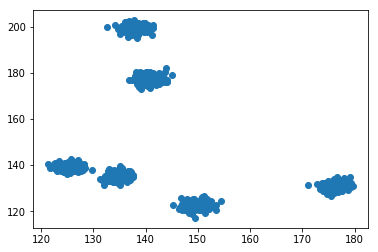

In [9]:
#Generate isotropic Gaussian blobs for clustering.

center_box = (100, 200)
std = 1.5
X_gaussian,y = make_blobs(800, n_features=2, centers=6, center_box=center_box, cluster_std=std, random_state=50)

#X_gaussian = genfromtxt('x_gaussian.csv', delimiter=',')
plt.scatter(X_gaussian[:,0], X_gaussian[:,1])
plt.show()

In [10]:
gap_statistic(X_gaussian)

k	Wk		Wkbs		sk		gap
1	12.2399912	12.0924757	0.0251043	-0.1475155
2	11.0583813	11.3655074	0.0267317	0.3071261
3	10.0915992	11.0454459	0.0245003	0.9538466
4	9.3134831	10.7042728	0.0228643	1.3907897
5	7.8908096	10.4445844	0.0114639	2.5537748
6	6.8135071	10.2072814	0.0152639	3.3937743
7	6.7389266	10.0736434	0.0300486	3.3347168
8	6.6620197	9.9258856	0.0207200	3.2638659
9	6.5911199	9.8269826	0.0225446	3.2358628


Best number of clusters:  6
